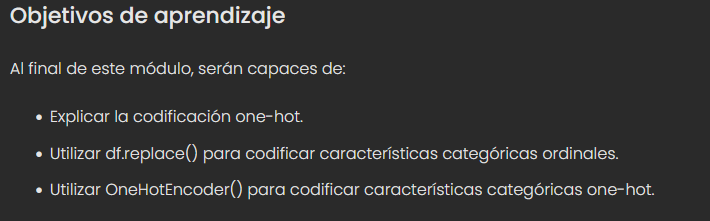

# Por que codificar caracteristicas ?

Los modelos computacionales solo pueden modelar numeros. Para que la comptuadora "entienda" nuestros datos, estos deben estar en forma numerica.

El problema es: 

### Como representar palabras como "rojo","azul" o "verde" en numeros?


# Codificacion ordinal

Como se vio previamente, si existe un orden de palabras como "bajo" ,"medio", "alto", entonces podemos codificarlos como numeros ordenados {"bajo":0,"medio":1,"alto":2} .

pero cuando los numeros no estan ordenados, como los colores, podemos codificar los datos de one-hot

# Que es la codificacion one-hot?

En primer lugar, la codificacion one-hot NO captura el significado de las palabras. La computadora no sabe como es el color azul, pero si puede encontrar las relaciones entre el color y otras variables en el contexto de un conjunto de datos.

Para representar las caracteristicas no ordenadas o "nominales", se hara lo siguiente:

1. crear una nueva columna para cada categoria presente en la caracteristica.

2. establecer el valor de cada una de las nuevas columnas a 1 si esa fila corresponde a la categoria original

3. establecer el valor de cada una de las nuevas columnas a 0 si no lo hacen.

4. eliminar la columna original.

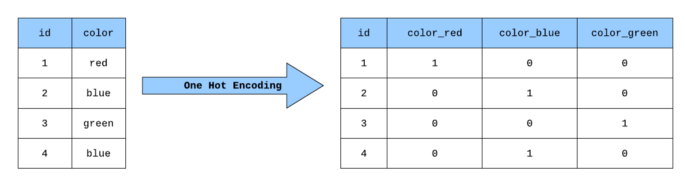

La primera fila del dataframe en la izquierda tiene el valor "rojo" en la columna "color". En el nuevo dataframe a la derecha, la primera fila tiene un 1 bajo la columna "color_red" y un 0 en las otras dos columnas.

las categorias desordenadas se han codificado como numeros.



# Codificacion One-Hot en Python

Descripcion del proceso:

1. Importar paquetes necesarios
2. Cargar los datos
3. Dividir las columnas de datos en X(caracteristicas) e y(objetivo)
4. Dividir las filas de datos en conjuntos de entrenamiento y de prueba
5. Codificar datos categoricos ordinales.
6. Dividir las columnas categoricas nominales a partir del DataFrame.
7. Ajustar una clase OneHotEncoder en las caracteristicas de entrenamiento.
8. Usar el OneHotEncoder ajustado para transformar las caracteristicas categoricas de entrenamiento y de prueba en versiones de codificacion one-hot
9. Convertir los arrays NumPy resultantes en DataFrames Pandas.
10. Concatenar las columnas numericas con las nuevas caracteristicas de la codificacion one-hot


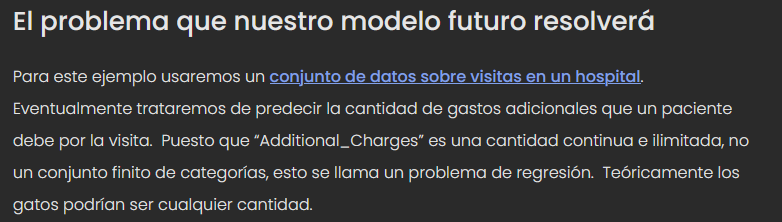

In [1]:
from google.colab import drive
drive.mount ("/content/drive")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


Mounted at /content/drive


In [2]:
filename = "/content/drive/MyDrive/Data CodingDojo/Raw_Medical_Data_for_day1.csv"

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   State               1000 non-null   object 
 2   Lat                 1000 non-null   float64
 3   Lng                 1000 non-null   float64
 4   Area                1000 non-null   object 
 5   Children            993 non-null    float64
 6   Age                 1000 non-null   int64  
 7   Income              1000 non-null   float64
 8   Marital             1000 non-null   object 
 9   Gender              1000 non-null   object 
 10  ReAdmis             1000 non-null   int64  
 11  VitD_levels         1000 non-null   float64
 12  Doc_visits          1000 non-null   int64  
 13  Full_meals_eaten    1000 non-null   int64  
 14  vitD_supp           1000 non-null   int64  
 15  Soft_drink          1000 non-null   int64  
 16  Initial

#Codificacion Ordinal

La columna "Complication_Risk" esta ordenada, y podemos usar la codificacion ordinal para esta. El metodo df.replace() funciona para esto.

In [5]:
df["Complication_risk"].value_counts()

Medium    462
High      312
Low       222
Med         4
Name: Complication_risk, dtype: int64

In [6]:
df["Complication_risk"].replace({"Low":0,"Med":1,"Medium":1,"High":2}, inplace=True)
df["Complication_risk"].value_counts()

1    466
2    312
0    222
Name: Complication_risk, dtype: int64

##**NOTA**
La codificacion ordinal que se hizo arriba no dependio de la inforamcion de los datos de prueba, por lo que no causaria una fuga de datos. Podemos hacer esto antes de dividir los datos.

# Asignacion de X y train test split

Para esta tarea, el proposito es predecir los "Additional_charges" que se basan en las otras caracteristicas en el conjunto de datos.

Por lo tanto, asignaremos "Additional_charges" como nuestro objetivo(y)

Asignaremos el resto de las columnas como las caracteristicas(X). Tambien eliminaremos la columna"Unnamed:0" ya que no es una caracteristica relevante.

In [7]:
X = df.drop(columns=["Unnamed: 0","Additional_charges"])
y = df["Additional_charges"]
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

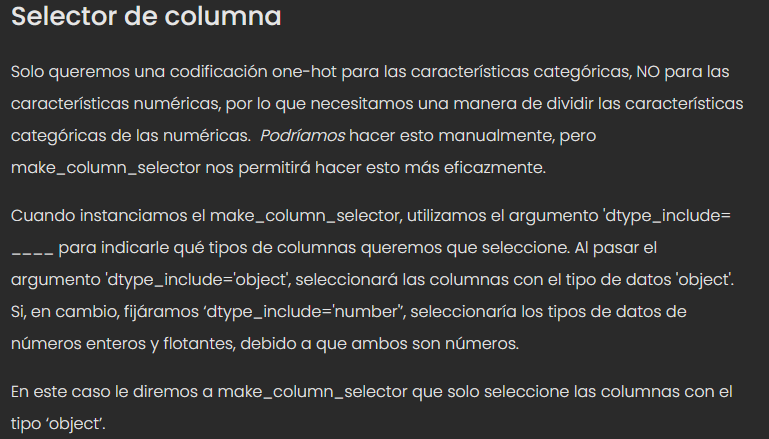

In [8]:
# Selector categorico
cat_selector = make_column_selector(dtype_include ="object")

# Seleccion de columnas categoricas

Cuando aplicamos el cat_selector a un dataframe, volvera a una lista con los nombres de las columnas que coinciden con el patron que le dimos

In [9]:
cat_selector(X_train)

['State', 'Area', 'Marital', 'Gender', 'Initial_admin', 'Services']

Ahora podemos utilizar esa lista a un subconjunto de un conjunto de datos original.

El codigo de abajo crea dos dataframes nuevos (train_cat_data and test_cat_data)
que contiene solo seleccionado las caracteristicas del objeto con cat_selector.

In [10]:
# creen un subconjunto de datos solo para las columnas categoricas.
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]

train_cat_data

,State,Area,Marital,Gender,Initial_admin,Services
82,TN,Urban,Never Married,Female,Emergency Admission,Intravenous
991,AL,Urban,Married,Male,Emergency Admission,Blood Work
789,TN,Urban,Married,Nonbinary,Observation Admission,Intravenous
894,SD,Rural,Never Married,Male,Observation Admission,Blood Work
398,MI,Suburban,Widowed,Female,Elective Admission,Blood Work
...,...,...,...,...,...,...
106,NY,Suburban,Widowed,Male,Observation Admission,Intravenous
270,IN,Suburban,Married,Male,Observation Admission,Blood Work
860,OH,Urban,Divorced,Male,Elective Admission,Blood Work
435,CA,Suburban,Separated,Male,Observation Admission,Blood Work


# OneHotEncoder

La clase OneHotEncoder de Scikit-Learn hara todo el trabajo de la codificacion one-hot por nosotros, pero queremos hacer algunos cambios a partir de las configuraciones por defecto cuando instanciamos el OneHotEncoder



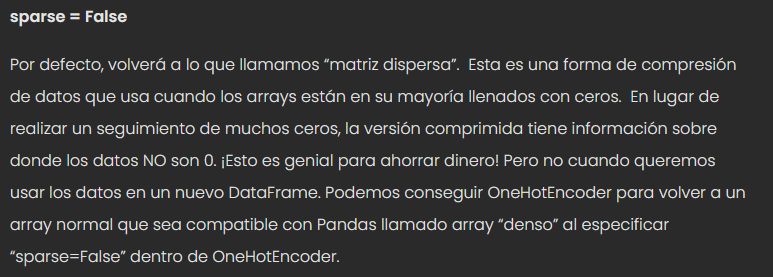

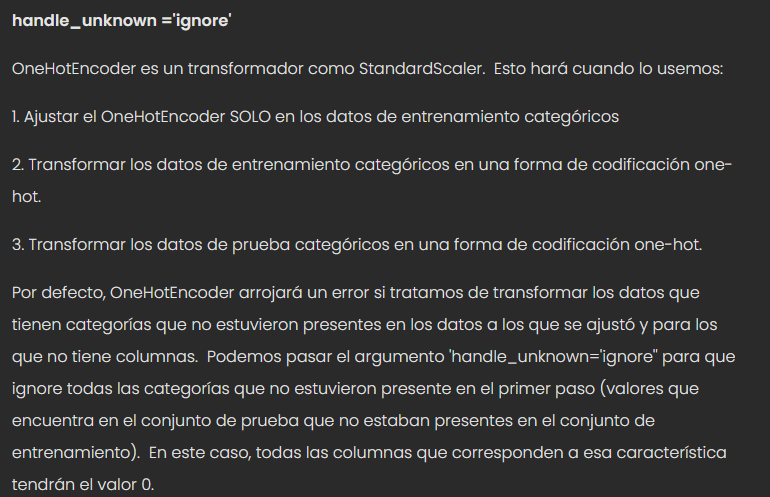

In [11]:
# instancien la codificación one-hot
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# ajusten el OneHotEncoder en los datos de entrenamiento
ohe_encoder.fit(train_cat_data)
# transforme los datos de entrenamiento y de prueba
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe



array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

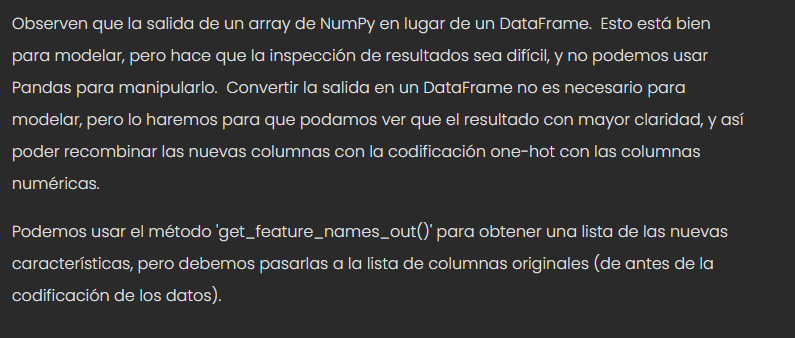

In [12]:
# conviertan a un DataFrame, obtengan una nueva columna de nombres a partir de la codificación 
# establezcan prefijos a la columna de nombres original
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_FL,State_GA,...,Gender_f,Gender_m,Gender_male,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Observen que habra un 0,0 para todas las columnas de "state" de cada fila, excepto una. la columna que corresponde a "state" para esa fila tendra un 1.0

# Concatenar las caracteristicas categoricas de codificacion one-hot con las numericas.

ahora podemos seleccionar las columnas numericas a partir de los datos originales y concatenarlos con datos nuevos de codificacion one-hot

podemos utilizar la funcion de pandas pd.concat(). Este por defecto concatena en el eje 0, las filas. ** Pero nosotros queremos concatenar las columnas** asi que estableceremos "axis=1"

# Restablecer el indice

Tambien hay que resaltar que pandas intentara usar el indice para determinar como igualar las filas. Cuando dividimos los datos, se mezclan con el indice y cuando se hace una codificacion one-hot, restablecen el indice. Las filas se quedan en el mismo orden pero los indices ya no coinciden.

Podemos arreglar esto al restablecer el indice de las columnas numericas. ESTE ES UN PASO IMPORTANTE

In [13]:
# creen un selector numérico
num_selector = make_column_selector(dtype_include='number')
# aislen las columnas numéricas
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# recombinen los conjuntos de entrenamiento y de prueba en el eje 1 (columnas)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed


,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Gender_f,Gender_m,Gender_male,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,36.16307,-86.66510,2.0,60,8459.99,0,19.034162,5,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34.96594,-87.12179,5.0,78,22669.31,0,15.903388,7,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,36.24648,-83.51232,1.0,60,25536.25,0,18.225040,4,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,45.42189,-97.91165,7.0,82,94863.57,0,15.809932,5,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,42.33661,-83.28292,0.0,37,30898.36,0,20.640410,5,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,42.05701,-77.43901,1.0,32,4788.93,0,19.029312,6,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
746,40.47773,-86.38658,4.0,27,29461.62,0,15.293840,5,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
747,40.56510,-81.07429,0.0,57,79094.04,0,19.459084,5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
748,33.97472,-118.35549,0.0,56,25697.12,0,15.871725,5,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


ahora todas las columnas en nuestro dataframe son numericas sin perdida de datos. Este dataframe se puede usar en un modelo, sin embargo, es probable que tambien queramos escalar las columnas numericas si estamos usando ciertos tipos de modelos. Hay otra clase que muestra como hacer esto.

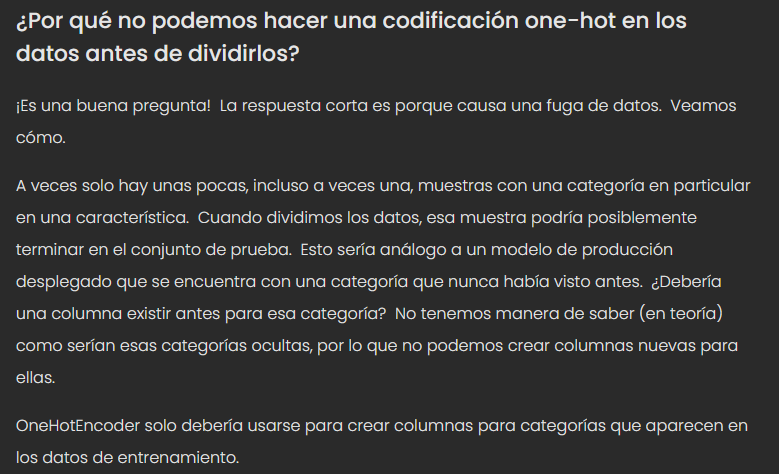

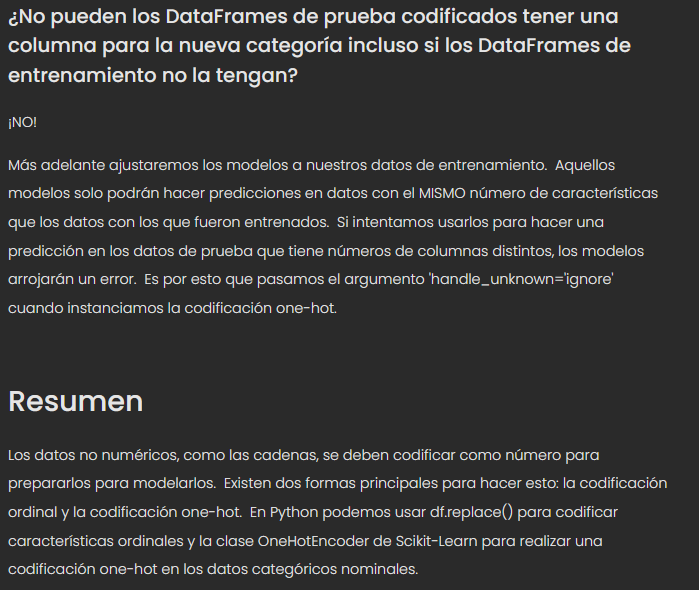